# Data Visualization using Python
### Muluken Muche
This data visualization use several python libraries to showcase available plots and charts to visualize NCSES data. The libraries include  seaborn, matplotlib, bokeh, plotly, ggplot, altair, and geoplotlib as necessary. The purpose is to create a template of figures so that we could use for similar data. Python codes are adopted from several freely available websites. This plots and cahrts use two tables downloaded from https://ncses.nsf.gov/pubs/nsf19301/data and the 2017 National survey of College Graduates downloaded from https://ncsesdata.nsf.gov/datadownload/.

## 1) Doctorate recipients, by broad field of study and sex: selected years, 1987–2017

In [1]:
import os
import sys
import openpyxl
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import mosaicplot
from statsmodels.graphics.mosaicplot import mosaic
sns.set(style="ticks", color_codes=True)
from rpy2.robjects.packages import importr


Bad key "text.kerning_factor" on line 4 in
C:\Users\Muluken\Anaconda3\envs\Python-R\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
dFF = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/Other/sed17-sr-tab014_Edited.xlsx')
dFF.head(6)

Field of Study     Sex  Year  Number  Percent
0                         Life sciences    Male  1987    3747     64.8
1                         Life sciences  Female  1987    2036     35.2
2  Physical sciences and earth sciences    Male  1987    3177     83.4
3  Physical sciences and earth sciences  Female  1987     634     16.6
4     Mathematics and computer sciences    Male  1987     999     84.0
5     Mathematics and computer sciences  Female  1987     190     16.0

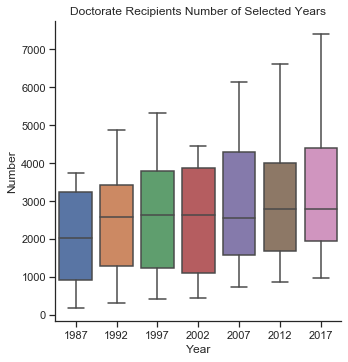

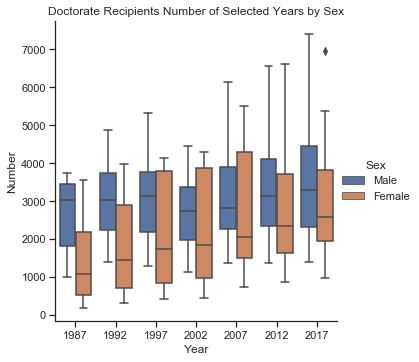

In [3]:
sns.catplot(x="Year", y="Number", kind="box",
            data=dFF).set(title="Doctorate Recipients Number of Selected Years");
sns.catplot(x="Year", y="Number", hue="Sex", kind="box",
            data=dFF).set(title="Doctorate Recipients Number of Selected Years by Sex");

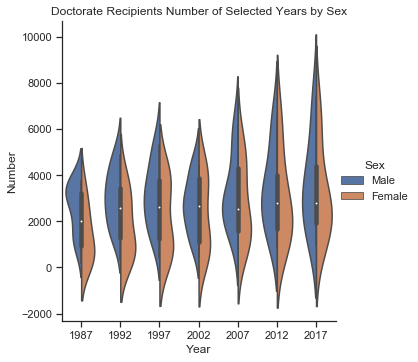

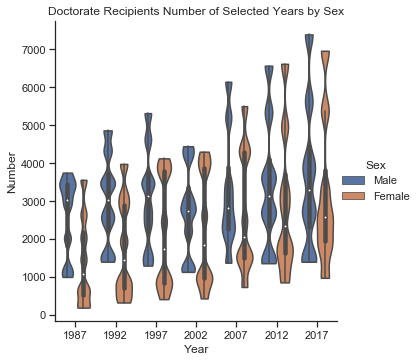

In [4]:
sns.catplot(x="Year", y="Number", hue="Sex",
            kind="violin", split=True,
            data=dFF).set(title="Doctorate Recipients Number of Selected Years by Sex");
sns.catplot(x="Year", y="Number", hue="Sex",
            kind="violin", bw=.15, cut=0,
            data=dFF).set(title="Doctorate Recipients Number of Selected Years by Sex");


C:\Users\Muluken\Anaconda3\envs\Python-R\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


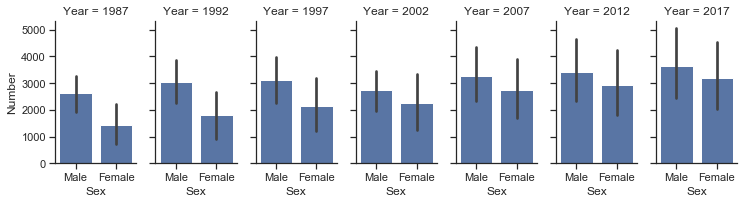

In [5]:
g = sns.FacetGrid(dFF, col="Year", hue_order="Sex",  height=3, aspect=0.5)
g.map(sns.barplot, "Sex", "Number");
#g.fig.suptitle("Doctorate Recipients Number of Selected Years by Sex")

Text(0.5, 1.0, 'Doctorate Recipients Number of Selected Years by Sex')

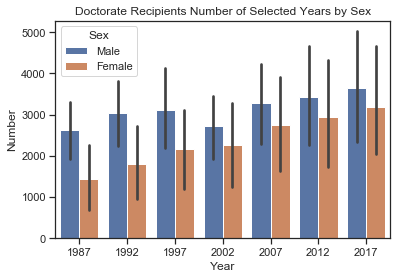

In [6]:
ax = sns.barplot(x="Year", y="Number", hue="Sex", data=dFF);
ax.set_title("Doctorate Recipients Number of Selected Years by Sex")

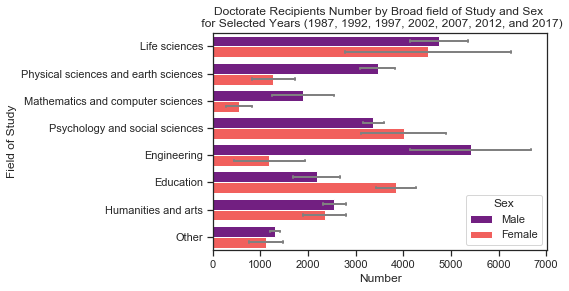

In [7]:
# create plot
chart = sns.barplot(x = 'Number', y = 'Field of Study', hue = 'Sex', data = dFF,
            palette =  'magma',
           # order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
dFF.groupby(['Sex', 'Field of Study']).mean()['Number']
dFF.groupby(['Sex', 'Field of Study']).std()['Number']
chart.set_title("Doctorate Recipients Number by Broad field of Study and Sex \n for Selected Years (1987, 1992, 1997, 2002, 2007, 2012, and 2017)")
plt.show()

Field of Study     Sex  Year  Number  Percent
0                         Life sciences    Male  1987    3747     64.8
1                         Life sciences  Female  1987    2036     35.2
2  Physical sciences and earth sciences    Male  1987    3177     83.4
3  Physical sciences and earth sciences  Female  1987     634     16.6
4     Mathematics and computer sciences    Male  1987     999     84.0

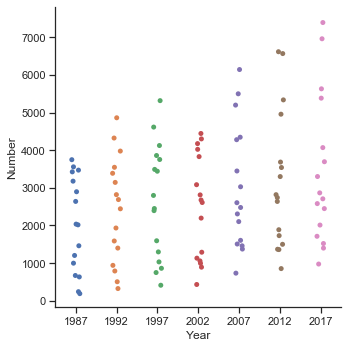

In [8]:
# Categorical scatterplots
sns.catplot(x="Year", y="Number",  data=dFF);
dFF.head()

In [9]:
g = sns.FacetGrid(dFF, col="Sex",  margin_titles=True)
g.map(sns.regplot, "Year", "Number", color=".2", fit_reg=False, x_jitter=.1);

In [10]:
dFF = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/Other/sed17-sr-tab014_Edited.xlsx')
dFF2 = dFF.reset_index()
dFFm = dFF2.groupby(['Field of Study', 'Sex']).sum()

In [11]:
dFF = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/Other/sed17-sr-tab014_Edited.xlsx')
dFFm =dFF[dFF['Sex']=='Male']
dFFf =dFF[dFF['Sex']=='Female']

dFFms = dFFm.groupby(['Field of Study', 'Sex']).mean()
dFFfs = dFFf.groupby(['Field of Study', 'Sex']).mean()

#dFFms.head(50)
dFFfs.head(5)

Year       Number    Percent
Field of Study                    Sex                                   
Education                         Female  2002.0  3842.571429  64.128571
Engineering                       Female  2002.0  1190.142857  16.257143
Humanities and arts               Female  2002.0  2351.142857  47.571429
Life sciences                     Female  2002.0  4528.285714  47.028571
Mathematics and computer sciences Female  2002.0   560.857143  21.814286

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Education', 'Engineering', 'Humani./Arts', 'Life Science', 'Math/CompScie', 'Other', 'Physical/EarthScie', 'Psychology/SocialScie'
sizesm = dFFms['Number']
sizesf = dFFfs['Number']
colors = ['gold', 'yellowgreen', 'lightcoral', 'cyan', 'red','dodgerblue', 'peru','mediumorchid']
explodef = (0, 0, 0, 0.1, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
explodem = (0, 0.1, 0, 0, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizesf, explode=explodef, labels=labels, colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

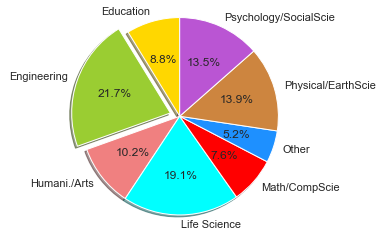

In [13]:
fig2, ax2 = plt.subplots()
ax2.pie(sizesm, explode=explodem, labels=labels, colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 2) U.S. citizen and permanent resident doctorate recipients, by major field of study and race/ethnicity: 2017  

In [14]:
df = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/Other/sed17-sr-tab024_edited_Formatted.xlsx')
df.columns = ['AllFields', 'Field of Study', 'Sub Field', 'Sub Field Number', 'Race/Ethnicity', 'Percent','Number', 'Unnamed1', 'Unnamed2', 'Number2','Unnamed']
dfA = df[['Field of Study', 'Sub Field', 'Race/Ethnicity', 'Number','Percent']] 
dfA.set_index("Field of Study", inplace = True) 
dfA.head()
# Data by Field of Study
LSc   = dfA.loc['Life sciences']
PSES = dfA.loc['Physical sciences and earth sciences']
MCS   = dfA.loc['Mathematics and computer sciences']
PSYC  = dfA.loc['Psychology and social sciences ']
Engr  = dfA.loc['Engineering']
HumAr = dfA.loc['Humanities and arts']
Oth  = dfA.loc['Other']
#dfA.shape

In [15]:
# Aggregate Race/Ethnicity
dfA_mean = dfA.groupby('Race/Ethnicity', as_index=False)['Percent'].mean()
# Reorder it following the values:
ordered_dfA = dfA_mean.sort_values(by='Percent')
my_range=range(1,len(ordered_dfA.index)+1)

plt.hlines(y=my_range, xmin=0, xmax=ordered_dfA['Percent'], color='olive')
plt.plot(ordered_dfA['Percent'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_dfA['Race/Ethnicity'])
plt.title("2017 U.S. Citizen and Permanent Resident \n Doctrate Recipients by Race/Ethnicity", loc='center')
plt.xlabel('Percent')
plt.ylabel('Race/Ethnicity')


Text(0, 0.5, 'Race/Ethnicity')

In [16]:
sns.catplot(y="Race/Ethnicity", x="Percent", height=4, aspect=3,kind="box", data=dfA);
#sns.catplot(x="'Race/Ethnicity'", y="Number", hue="smoker", kind="box", data=dfA_mean);


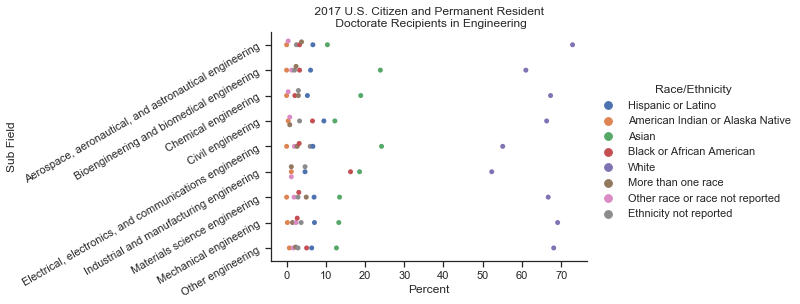

In [17]:
chart = sns.catplot(x = "Percent", y="Sub Field",   height=4, aspect=2.5, hue="Race/Ethnicity", kind="swarm", data=Engr).set(title=" 2017 U.S. Citizen and Permanent Resident \n Doctorate Recipients in Engineering");
chart.set_yticklabels(rotation=30)

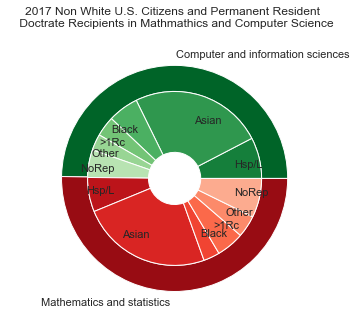

In [18]:
## https://python-graph-gallery.com/163-donut-plot-with-subgroups/
 
# Make data: I have 3 groups and 7 subgroups
#Life Science
group_names=['Computer and information sciences', 'Mathematics and statistics ']
group_size=[280,283]
#subgroup_names=['Hsp/L', 'AmInd', 'Asian', 'Black', 'White', '>1Rc', 'Other', 'NoRep', 'Hsp/L', 'AmInd', 'Asian', 'Black', 'White', '>1Rc', 'Other', 'NoRep']
#subgroup_size=[43, 0, 139, 32,515,21,17,29,36,1,137,17,666,29,23,41]
subgroup_names=['Hsp/L','Asian', 'Black',  '>1Rc', 'Other', 'NoRep', 'Hsp/L',  'Asian', 'Black',  '>1Rc', 'Other', 'NoRep']
subgroup_size=[43,139, 32,21,17,29,36, 137,17,29,23,41]

 
# Create colors
a, b, =[plt.cm.Greens, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.9), b(0.9)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.8), a(0.7), a(0.6),a(0.5), a(0.4), a(0.3), b(0.8), b(0.7), b(0.6),b(0.5), b(0.4), b(0.3)])
plt.setp( mypie2, width=0.7, edgecolor='white')
plt.margins(0,0)
 
figure_title = "2017 Non White U.S. Citizens and Permanent Resident \n Doctrate Recipients in Mathmathics and Computer Science"  
plt.text(0.5, 1.2, figure_title,
         horizontalalignment='center',
         fontsize=12,
         transform = ax.transAxes)
# show it
plt.show()

In [19]:
modified = dfA.reset_index()
modified.head()

Field of Study                                    Sub Field  \
0  Life sciences  Agricultural sciences and natural resources   
1  Life sciences  Agricultural sciences and natural resources   
2  Life sciences  Agricultural sciences and natural resources   
3  Life sciences  Agricultural sciences and natural resources   
4  Life sciences  Agricultural sciences and natural resources   

                     Race/Ethnicity   Number  Percent  
0                Hispanic or Latino   48.708      5.4  
1  American Indian or Alaska Native    1.804      0.2  
2                             Asian   62.238      6.9  
3         Black or African American   40.590      4.5  
4                             White  673.794     74.7

Field of Study                                    Sub Field  \
0  Life sciences  Agricultural sciences and natural resources   
1  Life sciences  Agricultural sciences and natural resources   
2  Life sciences  Agricultural sciences and natural resources   
3  Life sciences  Agricultural sciences and natural resources   
4  Life sciences  Agricultural sciences and natural resources   

                     Race/Ethnicity   Number  Percent  
0                Hispanic or Latino   48.708      5.4  
1  American Indian or Alaska Native    1.804      0.2  
2                             Asian   62.238      6.9  
3         Black or African American   40.590      4.5  
4                             White  673.794     74.7

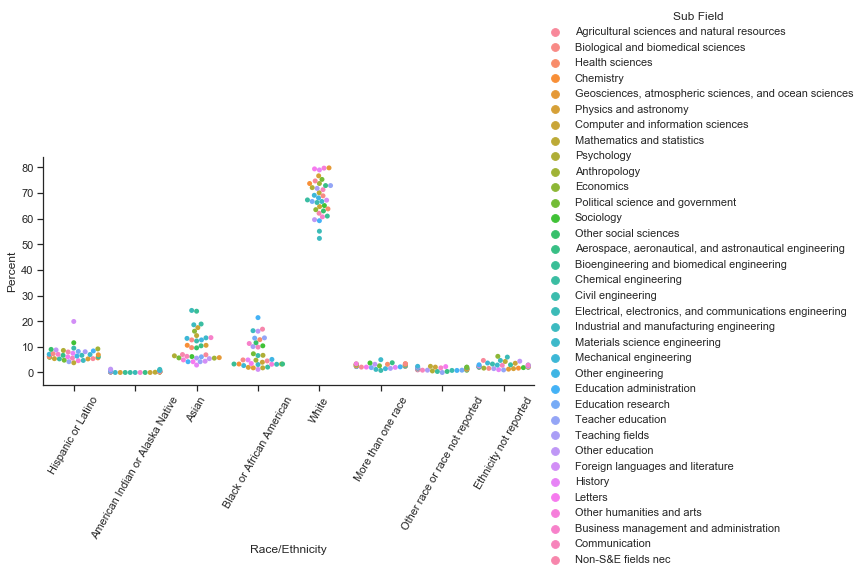

In [20]:
modified = dfA.reset_index()

chart =sns.catplot(x="Race/Ethnicity", y="Percent", height=4, aspect=2, hue="Sub Field", kind="swarm", data=modified );
chart.set_xticklabels(rotation=60)
modified.head()

## 3) National Survey of College Graduates: 2017  

In [21]:
epcg17 = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/epcg17_ForAnalysis.xlsx')
epcg17.columns
Race = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/RACETHM.xlsx')
Loc = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/BARGN.xlsx')
Loc2 = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/BAST.xlsx')

In [22]:
nData = pd.merge(epcg17, Race)
nData2 = pd.merge(nData, Loc)
nData3 = pd.merge(nData2, Loc2)
nData3.shape
nData3.head()
nData3.columns

Index(['AGE', 'AGEGR', 'ASDGRI', 'ASIAN', 'BAACYR', 'BARGN', 'BAST', 'BAYR',
       'BIRMN', 'BIRYR', 'BLACK', 'BSDGRI', 'BTHRGN', 'CTZUSIN', 'GENDER',
       'HISPANIC', 'NATIVE', 'PACIFIC', 'RACEM', 'RACETHM', 'WHITE', 'WRKGP',
       'RaceEthn', 'LocSch', 'Country', 'Continent', 'Cntr', 'CC', 'ISO2_code',
       'ISO3_code'],
      dtype='object')

In [23]:
df3 = nData3[['AGE','AGEGR', 'BAYR',  'GENDER',  'WRKGP', 'RaceEthn', 'Cntr', 'Continent', 'CC', 'ISO2_code','ISO3_code']]
# AGE     --- Age
# AGEGR   --- Age Group (5 year intervals)
# ASDGRI  --- 2-Year Associates Degree
# BAACYR  --- Academic year of award for first bachelor's degree
# BARGN   --- Location of school awarding first bachelor's degree (region code)
# BAST    --- Location of school awarding first bachelor's degree (state/country code)
# BAYR    --- Year of award of first bachelor's degree
# BIRMN   --- Birth date: Month
# BIRYR   --- Birth date: Year
# BSDGRI  --- Bachelor's or high degree indicator
# BTHRGN  --- Place of birth (region code)
# GENDER  --- Gender
# RACEM   --- Race 
# RACETHM --- Race/ethnicity
# WRKG    --- Working for pay or profit during reference week

In [24]:
epcg17 = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/epcg17_ForAnalysis.xlsx')
epcg17.columns
Race = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/RACETHM.xlsx')
Loc = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/BARGN.xlsx')
Loc2 = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/ExtractedFromSAS/BAST.xlsx')
nData = pd.merge(epcg17, Race)

nData2 = pd.merge(nData, Loc)
nData3 = pd.merge(nData2, Loc2)
nData3.shape
nData3['Number']=1
nData3.head(3)

AGE  AGEGR ASDGRI ASIAN  BAACYR BARGN  BAST  BAYR  BIRMN  BIRYR  ... WRKGP  \
0   37     35      Y     N    2002    00    99  2002     97   1979  ...     Y   
1   45     45      N     N    1994    00    99  1994     97   1972  ...     Y   
2   52     50      N     N    1988    00    99  1988     97   1964  ...     Y   

  RaceEthn          LocSch Country Continent           Cntr   CC ISO2_code  \
0    Black  US Unspecified      US       NA.  United States  NaN        US   
1    Black  US Unspecified      US       NA.  United States  NaN        US   
2    Black  US Unspecified      US       NA.  United States  NaN        US   

   ISO3_code  Number  
0        USA       1  
1        USA       1  
2        USA       1  

[3 rows x 31 columns]

In [25]:
#epcg17.columns

In [26]:
df3 = nData3[['AGE','AGEGR', 'BAYR',  'GENDER',  'WRKGP', 'RaceEthn', 'Cntr', 'Continent', 'CC', 'ISO2_code','ISO3_code', 'Number']]
df3.columns
df3.head()
df3.shape

(83672, 12)

In [27]:
#df3 = nData3[['AGE','AGEGR', 'BAYR',  'GENDER',  'WRKGP', 'RaceEthn', 'Cntr', 'Continent', 'Value']]
df3 = nData3[['AGEGR',  'BAYR', 'GENDER', 'RaceEthn', 'WRKGP', 'Number']]
df4 = df3.groupby([ 'AGEGR','GENDER', 'RaceEthn', 'WRKGP'])['Number'].agg('sum')
df4.head(100)
#df3.describe(include='all')
df5 = df4.to_frame()
#df5.columns =df5[['AGEGR', 'GENDER','RaceEthn','BAYR', 'WRKGP', 'Value']]
df5.head(10)
#df5.columns
df6 = df5.reset_index()
#df5[['AGEGR', 'GENDER']] = df5.index
df6.head()

AGEGR GENDER     RaceEthn WRKGP  Number
0     20      F  AmIndNative     N       1
1     20      F  AmIndNative     Y       1
2     20      F        Asian     L      10
3     20      F        Asian     N      60
4     20      F        Asian     Y      50

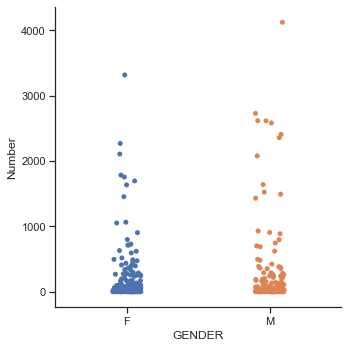

In [28]:
sns.catplot(x="GENDER", y="Number", data=df6);

In [29]:
g = sns.FacetGrid(df6, hue="GENDER", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "Number", "AGEGR", s=100, linewidth=.5, edgecolor="white")
g.add_legend();
plt.title("Scatterplot of Age Group of Bachelor Recipients by Gender \n, 2017 National survey of College Graduates")

Text(0.5, 1, 'Scatterplot of Age Group of Bachelor Recipients by Gender \n, 2017 National survey of College Graduates')

In [30]:
g = sns.FacetGrid(df6, col="GENDER", hue="WRKGP")
g.map(plt.scatter,  "Number", "AGEGR", alpha=.7)
g.add_legend();
plt.title("Scatterplot of Age Group of Bachelor Recipients by Gender and Employment Status indicator \n, 2017 National survey of College Graduates")

Text(0.5, 1, 'Scatterplot of Age Group of Bachelor Recipients by Gender and Employment Status indicator \n, 2017 National survey of College Graduates')

In [31]:
g = sns.FacetGrid(df6, row="WRKGP", col="GENDER", margin_titles=True)
g.map(sns.regplot, "AGEGR", "Number", color=".2", fit_reg=False, x_jitter=.1);

plt.title("Scatterplot of Age Group of Bachelor Recipients by Gender and Employment Status indicator \n, 2017 National survey of College Graduates")

Text(0.5, 1, 'Scatterplot of Age Group of Bachelor Recipients by Gender and Employment Status indicator \n, 2017 National survey of College Graduates')

Text(0.5, 1, 'Scatterplot of Age Group of Bachelor Recipients by G Race/Ethnicity \n, 2017 National survey of College Graduates')

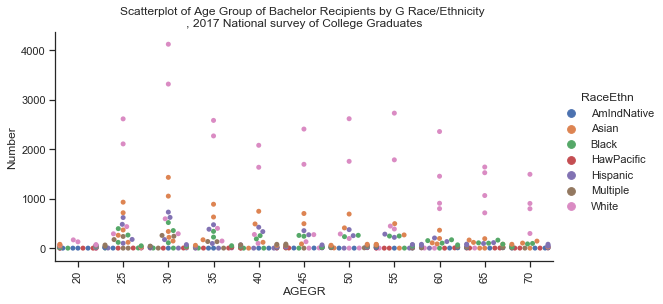

In [32]:
chart =sns.catplot(x="AGEGR", y="Number", height=4, aspect=2, hue="RaceEthn", kind="swarm", data=df6 );
chart.set_xticklabels(rotation=90)
#modified.head()
plt.title("Scatterplot of Age Group of Bachelor Recipients by G Race/Ethnicity \n, 2017 National survey of College Graduates")

Text(0.5, 1, 'Scatterplot of Age Group of Bachelor Recipients by Gender  \n, 2017 National survey of College Graduates')

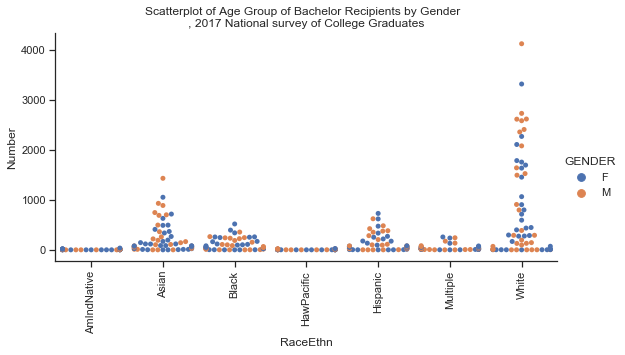

In [33]:
chart =sns.catplot(x="RaceEthn", y="Number", height=4, aspect=2, hue="GENDER", kind="swarm", data=df6 );
chart.set_xticklabels(rotation=90)
#modified.head()
plt.title("Scatterplot of Age Group of Bachelor Recipients by Gender  \n, 2017 National survey of College Graduates")

In [34]:
# Mosaic (marimmeko) plot example https://sukhbinder.wordpress.com/2018/09/18/mosaic-plot-in-python/

from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas
n, m = 12, 6
fig, ax = plt.subplots(figsize=(n, m))
mosaic(df3, [ 'RaceEthn', 'GENDER'], ax=ax)
plt.title("Mosaic map of Bachelor Recipients by Gender and Race/Ethnicity \n, 2017 National survey of College Graduates")
plt.show()

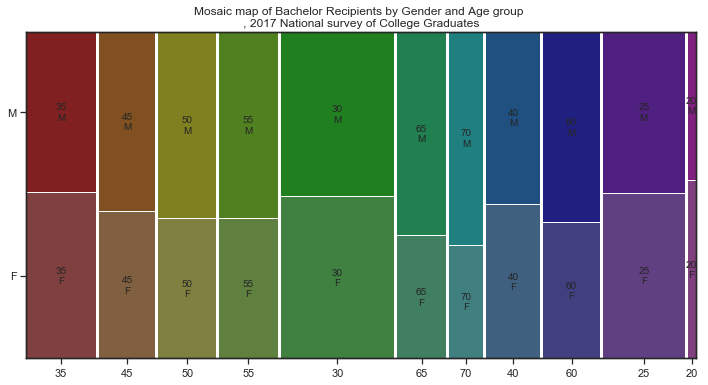

In [35]:
n, m = 12, 6
fig, ax = plt.subplots(figsize=(n, m))
mosaic(df3, [ 'AGEGR', 'GENDER'], ax=ax)
plt.title("Mosaic map of Bachelor Recipients by Gender and Age group \n, 2017 National survey of College Graduates")
plt.show()

In [36]:
dfT = df6[['GENDER', 'RaceEthn', 'Number']]
dfT.head(3)

GENDER     RaceEthn  Number
0      F  AmIndNative       1
1      F  AmIndNative       1
2      F        Asian      10

In [37]:
#df3 = nData3[['AGE','AGEGR', 'BAYR',  'GENDER',  'WRKGP', 'RaceEthn', 'Cntr', 'Continent', 'Value']]
d1 = nData3[[  'GENDER', 'RaceEthn', 'Number']]
d2 = d1.groupby([ 'GENDER', 'RaceEthn'])['Number'].agg('count')
d2.head(100)

d3 = d2.to_frame()

d3.head(10)
#df5.columns
d4 = d3.reset_index()
#df5[['AGEGR', 'GENDER']] = df5.index
d4.head(3)

GENDER     RaceEthn  Number
0      F  AmIndNative     181
1      F        Asian    6315
2      F        Black    3451

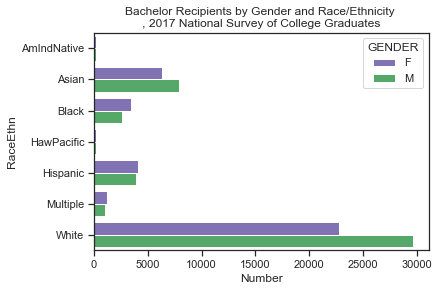

In [38]:
# create plot
chart = sns.barplot(x = 'Number', y = 'RaceEthn', hue = 'GENDER', data = d4,
            palette = ["m", "g"],
           # order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
d4.groupby(['GENDER', 'RaceEthn']).mean()['Number']
d4.groupby(['GENDER', 'RaceEthn']).std()['Number']
chart.set_title("Bachelor Recipients by Gender and Race/Ethnicity \n, 2017 National Survey of College Graduates")
plt.show()

In [39]:
#df3 = nData3[['AGE','AGEGR', 'BAYR',  'GENDER',  'WRKGP', 'RaceEthn', 'Cntr', 'Continent', 'Value']]
d1 = nData3[[  'AGEGR', 'RaceEthn', 'Number']]
d2 = d1.groupby([ 'AGEGR', 'RaceEthn'])['Number'].agg('count')
d2.head(100)

d3 = d2.to_frame()

d3.head(10)
#df5.columns
d4 = d3.reset_index()

d4.head()

AGEGR     RaceEthn  Number
0     20  AmIndNative       4
1     20        Asian     264
2     20        Black      93
3     20   HawPacific       7
4     20     Hispanic     147

In [40]:
d4s = d4.pivot("RaceEthn", "AGEGR", "Number")
d4s.head()

AGEGR         20    25    30    35    40    45    50   55   60   65   70
RaceEthn                                                                
AmIndNative    4    42    63    33    26    34    27   45   39   36   19
Asian        264  2423  3199  1772  1424  1346  1243  919  753  555  350
Black         93   835  1029   638   515   564   558  603  493  453  261
HawPacific     7    34    39    52    39    37    31   16   14   14   12
Hispanic     147  1394  1604   988   857   720   703  617  477  356  197

Text(0.5, 1, 'Heatmap map of Bachelor Recipients by Race/Ethnicity and Age group \n, 2017 National survey of College Graduates')

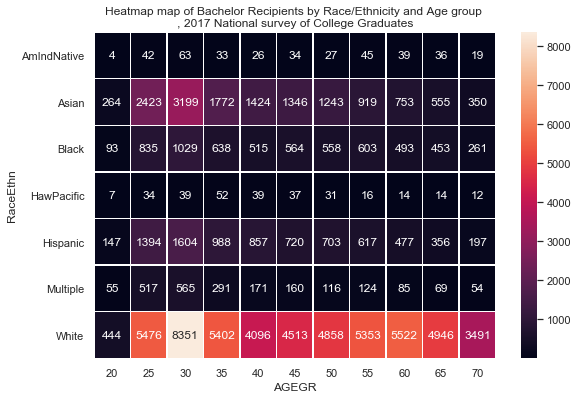

In [41]:
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(d4s, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Heatmap map of Bachelor Recipients by Race/Ethnicity and Age group \n, 2017 National survey of College Graduates")

In [42]:
df5 = d4.pivot("AGEGR", "RaceEthn",  "Number")
df5.head()

RaceEthn  AmIndNative  Asian  Black  HawPacific  Hispanic  Multiple  White
AGEGR                                                                     
20                  4    264     93           7       147        55    444
25                 42   2423    835          34      1394       517   5476
30                 63   3199   1029          39      1604       565   8351
35                 33   1772    638          52       988       291   5402
40                 26   1424    515          39       857       171   4096

In [43]:
r = [0,1,2,3,4,5,6,7,8,9,10]

# From raw value to percentage
#totals = [i+j+k for i,j,k,l,m, n, p in zip(df5['AmIndNative'], df5['Asian'], df5['Black'], df5['HawPacific'], df5['Hispanic'], df5['Multiple'], df5['White'])]
totals = [i+j+k+l+m+n for i,j,k,l,m, n in zip(df5['AmIndNative'], df5['Asian'], df5['Black'], df5['HawPacific'], df5['Hispanic'], df5['Multiple'])]
AmIndNative = [i / j * 100 for i,j in zip(df5['AmIndNative'], totals)]
Asian = [i / j * 100 for i,j in zip( df5['Asian'], totals)]
Black = [i / j * 100 for i,j in zip(df5['Black'], totals)]
HawPacific = [i / j * 100 for i,j in zip(df5['HawPacific'], totals)]
Hispanic = [i / j * 100 for i,j in zip( df5['Hispanic'], totals)]
Multiple = [i / j * 100 for i,j in zip(df5['Multiple'], totals)]
#White = [i / j * 100 for i,j in zip(df5['White'], totals)] 

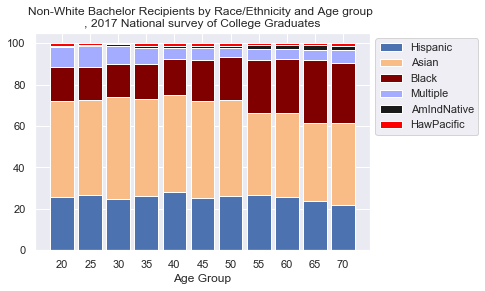

In [44]:
# plot
barWidth = 0.85
names = ('20','25','30','35','40', '45','50','55','60','65', '70')

# Create green Bars
plt.bar(r, Hispanic, color='b', edgecolor='white', width=barWidth, label="Hispanic")

plt.bar(r, Asian,  bottom = Hispanic, color='#f9bc86', edgecolor='white', width=barWidth, label="Asian")

plt.bar(r, Black,   bottom=[i+j for i,j in zip(Hispanic, Asian)], color='maroon', edgecolor='white', width=barWidth, label="Black")

plt.bar(r, Multiple, bottom=[i+j+k for i,j,k in zip(Hispanic, Asian, Black)], color='#a3acff', edgecolor='white', width=barWidth, label="Multiple")
# Create green Bars
plt.bar(r, AmIndNative, bottom=[i+j+k+l for i,j,k,l in zip(Hispanic, Asian, Black, Multiple)], color='k', edgecolor='white', width=barWidth, label="AmIndNative")
plt.bar(r, HawPacific, bottom=[i+j+k+l+m for i,j,k,l,m in zip(Hispanic, Asian, Black, Multiple,AmIndNative )], color='red', edgecolor='white', width=barWidth, label="HawPacific")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Age Group")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title("Non-White Bachelor Recipients by Race/Ethnicity and Age group \n, 2017 National survey of College Graduates")
# Show graphic
plt.show()


## 4) Science and Engineering State Profiles
Data Source: https://www.nsf.gov/statistics/states/interactive/show.cfm?stateID=53,33&year=0

In [45]:
nData3.columns

Index(['AGE', 'AGEGR', 'ASDGRI', 'ASIAN', 'BAACYR', 'BARGN', 'BAST', 'BAYR',
       'BIRMN', 'BIRYR', 'BLACK', 'BSDGRI', 'BTHRGN', 'CTZUSIN', 'GENDER',
       'HISPANIC', 'NATIVE', 'PACIFIC', 'RACEM', 'RACETHM', 'WHITE', 'WRKGP',
       'RaceEthn', 'LocSch', 'Country', 'Continent', 'Cntr', 'CC', 'ISO2_code',
       'ISO3_code', 'Number'],
      dtype='object')

In [46]:
dg = nData3['ISO3_code'].value_counts()
dg2 = dg.to_frame()
cont = nData3['CC'].value_counts()
cont2 = cont.to_frame()
#type(dg2)
#dg2.head()

In [47]:
dg3 = dg2.reset_index()

In [48]:
dg3 = dg3.rename(columns={'ISO3_code': "Number"})
dg3.head()

index  Number
0   USA   69366
1   IND    2439
2   CHN     933
3   CAN     578
4   PHL     452

In [49]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(dg3,  # Input Pandas DataFrame
                    locations="index",  # DataFrame column with locations
                    color="Number",  # DataFrame column with color values
                    hover_name= "index", # DataFrame column hover info
                    range_color=[1,69366], 
                    color_continuous_scale='RdYlGn') # Set to plot as US States
fig.update_layout(
    title_text = "2017 survey - Location of School Awarding First Bachelor's Degree" , # Create a Title
    geo_scope='world',  # Plot only the USA instead of globe
)
fig.show() 

In [50]:
dg3 = dg3[1:]
dg3.head()

index  Number
1   IND    2439
2   CHN     933
3   CAN     578
4   PHL     452
5   GBR     407

In [51]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(dg3,  # Input Pandas DataFrame
                    locations="index",  # DataFrame column with locations
                    color="Number",  # DataFrame column with color values
                    hover_name= "index", # DataFrame column hover info
                    range_color=[1,2439], 
                    color_continuous_scale='RdYlGn') # Set to plot as US States
fig.update_layout(
    title_text = "2017 survey - Location of School Awarding First Bachelor's Degree, US Excluded"  , # Create a Title
    geo_scope='world',  # Plot only the USA instead of globe
)
fig.show()  

In [52]:
import pandas as pd
import plotly.express as px  # Be sure to import express

Rank = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/GeographicData/Selected_Rank.xlsx')

Rank = Rank.rename(columns={'Gross domestic product, 2018 ($millions)': "GDP Rank",
                          'Total R&D performance, 2017 ($millions)': "Total R&D Rank",
                          'State government R&D expenditures, 2018 ($thousands)': "State GOV R&D Rank" })
Rank.head(5)

State State_ID Characteristic, data year (unit)  GDP Rank  \
0     Alabama       AL                             Rank        27   
1      Alaska       AK                             Rank        48   
2     Arizona       AZ                             Rank        20   
3    Arkansas       AR                             Rank        35   
4  California       CA                             Rank         1   

   Total R&D Rank  Business R&D performance, 2017 ($millions)  \
0              25                                          28   
1              39                                          34   
2              19                                          17   
3              43                                          40   
4               1                                           1   

   Higher education R&D performance, 2018 ($millions)  \
0                                                 23    
1                                                 46    
2                                                 18    
3                                                 39    
4                                                  1    

   Academic research space, 2017 (thousands sq. ft.)  \
0                                                 29   
1                                                 43   
2                                                 26   
3                                                 37   
4                                                  1   

   Federal R&D obligations, 2018 ($millions)  State GOV R&D Rank  \
0                                          7                22.0   
1                                         40                36.0   
2                                         20                34.0   
3                                         44                28.0   
4                                          2                 1.0   

   Utility patents issued to state residents, 2018  \
0                                               35   
1                                               51   
2                                               18   
3                                               38   
4                                                1   

   Population, 2019 (thousands)  All agencies  
0                            24             7  
1                            49            40  
2                            14            20  
3                            34            44  
4                             1             2

In [53]:
Value = pd.read_excel('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/GeographicData/Selected_Value.xlsx')
Value.head(5)

State State_ID Characteristic, data year (unit)  \
0     Alabama       AL                            Value   
1      Alaska       AK                            Value   
2     Arizona       AZ                            Value   
3    Arkansas       AR                            Value   
4  California       CA                            Value   

   Gross domestic product, 2018 ($millions)  \
0                                    221126   
1                                     54011   
2                                    346792   
3                                    128082   
4                                   2968118   

   Total R&D performance, 2017 ($millions)  \
0                                     5879   
1                                     1146   
2                                     7826   
3                                      812   
4                                   150552   

  Business R&D performance, 2017 ($millions)  \
0                                       1896   
1                                        912   
2                                       6338   
3                                        466   
4                                     132473   

   Higher education R&D performance, 2018 ($millions)  \
0                                               1003    
1                                                161    
2                                               1285    
3                                                311    
4                                               9780    

   Academic research space, 2017 (thousands sq. ft.)  \
0                                               2723   
1                                                867   
2                                               2887   
3                                               1349   
4                                              24443   

   Federal R&D obligations, 2018 ($millions)  \
0                                     5174.0   
1                                      300.0   
2                                     1737.0   
3                                      206.0   
4                                    17237.0   

   State government R&D expenditures, 2018 ($thousands)  \
0                                            21653.0      
1                                            10812.0      
2                                            12937.0      
3                                            16325.0      
4                                           633061.0      

   Utility patents issued to state residents, 2018  \
0                                              456   
1                                               46   
2                                             2551   
3                                              335   
4                                            39814   

   Population, 2019 (thousands)  All agencies  
0                          4903       5173700  
1                           732        299823  
2                          7279       1736998  
3                          3018        206209  
4                         39512      17236903

In [54]:
 fig = px.choropleth(Value,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="Gross domestic product, 2018 ($millions)",  # DataFrame column with color values
                    hover_name="State_ID", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Gross domestic product, 2018 ($millions)', # Create a Title
    geo_scope='north america',  # Plot only the USA instead of globe
)
fig.show() 

In [55]:
 fig = px.choropleth(Rank,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="GDP Rank",  # DataFrame column with color values
                    hover_name="State_ID", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings - Gross domestic product, 2018 ($millions)', # Create a Title
    geo_scope='north america',  # Plot only the USA instead of globe
)
fig.show() 

In [56]:
fig = px.choropleth(Value,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="Total R&D performance, 2017 ($millions)", hover_name="State", # DataFrame column with color values  
                    color_continuous_scale='BrBG', 
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Total R&D performance, 2017 ($millions)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

In [57]:
fig = px.choropleth(Rank,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="Total R&D Rank", hover_name="State", # DataFrame column with color values
                    range_color=[1,52],  
                    color_continuous_scale='Geyser', 
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings - Total R&D performance, 2017 ($millions)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show() 

In [58]:
fig = px.choropleth(Value,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="State government R&D expenditures, 2018 ($thousands)", hover_name="State", # DataFrame column with color values  
                    color_continuous_scale='Fall', 
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State government R&D expenditures, 2018 ($thousands)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

In [59]:
fig = px.choropleth(Rank,  # Input Pandas DataFrame
                    locations="State_ID",  # DataFrame column with locations
                    color="State GOV R&D Rank", hover_name="State", # DataFrame column with color values
                    range_color=[1,52],  
                    color_continuous_scale='RdYlGn', 
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings - State government R&D expenditures, 2018 ($thousands)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show() 

## 5) Other Example

This interactive plot of life expectancy by 5 years interval.

In [60]:
import plotly.express as px
gapminder = px.data.gapminder()
fig = px.choropleth(gapminder, locations="iso_alpha", 
                    color="lifeExp", hover_name="country", 
                    animation_frame="year", 
                    range_color=[20,80],  
                    color_continuous_scale='RdYlGn')
fig.show()